DATA EXPLORATION

In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [4]:
'''
data = pd.read_csv('/content/drive/MyDrive/DATA FILES/asteroid detection/AsteroidData.csv')
print(data)
'''

"\ndata = pd.read_csv('/content/drive/MyDrive/DATA FILES/asteroid detection/AsteroidData.csv')\nprint(data)\n"

In [5]:
csv_file_path = "C:\\Users\\Lalita Neeharika\\Desktop\\projects\\Asteroid detection\\AsteroidData.csv"
data = pd.read_csv(csv_file_path)
print(data)


c:\Users\Lalita Neeharika\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


              id    spkid          full_name      pdes     name prefix neo  \
0       a0000001  2000001            1 Ceres         1    Ceres    NaN   N   
1       a0000002  2000002           2 Pallas         2   Pallas    NaN   N   
2       a0000003  2000003             3 Juno         3     Juno    NaN   N   
3       a0000004  2000004            4 Vesta         4    Vesta    NaN   N   
4       a0000005  2000005          5 Astraea         5  Astraea    NaN   N   
...          ...      ...                ...       ...      ...    ...  ..   
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L      NaN    NaN   N   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L      NaN    NaN   N   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L      NaN    NaN   Y   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2      NaN    NaN   N   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3      NaN    NaN   N   

       pha       H  diameter  albedo  diameter_sigma orbit_id  

In [6]:
null_values = data.isnull().sum()
print(null_values)

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [7]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [8]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [9]:
data.tail()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000,7.433000,46.311000,27.383000,1.041200e+00,1.652100e-01,130.970000,726.490000,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,0.000016,0.000056,0.000238,0.000130,2.418900e-08,3.346100e-09,0.000469,0.000016,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,0.000019,0.000057,0.000090,0.000053,1.650100e-07,1.101600e-08,0.000283,0.000091,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,0.544880,4.391600,18.988000,10.838000,7.171600e-01,1.016700e-01,38.984000,503.550000,MBA,0.25641
958523,bT3S2678,3246553,(2678 T-3),2678 T-3,NaN,NaN,N,N,18.060,NaN,NaN,NaN,JPL 3,2443429.5,43429,19771013.0,J2000,0.258348,2.260404,1.676433,9.661947,204.512448,148.496988,15.320134,2.844376,0.290018,2.443377e+06,1.977082e+07,1241.302609,3.398501,0.680220,264.721217,1.486800e-02,1.292700e-01,6.252600e-02,1.102300,0.311700,1.284300,0.473610,1.626700e-01,2.487900e-02,5.523600,106.480000,MBA,0.26980


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [11]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [12]:
data.shape

(958524, 45)

In [13]:
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


In [14]:
data['pha'].value_counts(normalize=True)*100    #potentially hazardous asteroids
# returns the frequencies of unique values in the pha column. the normalize = True returns the values as frequencies instead of the actual count

N    99.779886
Y     0.220114
Name: pha, dtype: float64

In [15]:
data['neo'].value_counts(normalize=True)*100    #near earth objects

N    97.611422
Y     2.388578
Name: neo, dtype: float64

In [16]:
print(data['orbit_id'].unique())
print(data['orbit_id'].nunique())
# this prints the orbit names that are unique and returns the number of unique orbits

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [17]:
# comet designation prefix
print(data['prefix'].unique())
print(data['prefix'].nunique())
# used to understand the variety of prefixes in the given dataset
# prefixes are used to understand the type of asteroid in a certain way

[nan 'A']
1


In [18]:
# equinox reference
print(data['equinox'].unique())
print(data['equinox'].nunique())

['J2000']
1


In [19]:
# Orbit classification
print(data['class'].unique())
print(data['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


In [20]:
data1 = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)   #creating a new database called data1 which doesnt have the dropped columns
# dropping these columns because Columns 'id', 'spkid' and 'full_name' are unique for each row. The 'full_name' column values are split into columns 'pdes' and 'name'. These columns can be removed since they will not facilitate in the analysis. The 'id' column has alphanumeric values whereas column 'spkid' doesn't. So column 'id' can be removed as well.
# Columns 'prefix' and 'equinox' have only one value so they can be eliminated as well.

DATA WRANGLING

In [21]:
# analysing missing values

In [22]:
#here we're making the new dataframe asteroid_data taking into acc all values of the pha column that are not null
asteroid_df = data1[data1['pha'].notna()]     #creating another dataframe called asteroid_df that contains more accurate data by either filling in values or deleting columns
asteroid_df = asteroid_df.drop(['diameter', 'albedo', 'diameter_sigma'], axis= 'columns')
# dropping these columns since they have a lot of missing values and filling the data up using methods will not give accurate results
# here in this entire dataset, pha is the most important column since it detects the potentially hazardous asteroids

In [23]:
null_count = asteroid_df.isnull().sum()
print(null_count)

spkid           0
full_name       0
neo             4
pha             0
H            6262
orbit_id        0
epoch           0
epoch_mjd       0
epoch_cal       0
e               0
a               0
q               0
i               0
om              0
w               0
ma              1
ad              4
n               0
tp              0
tp_cal          0
per             4
per_y           1
moid            0
moid_ld         0
sigma_e         1
sigma_a         1
sigma_q         1
sigma_i         1
sigma_om        1
sigma_w         1
sigma_ma        1
sigma_ad        5
sigma_n         1
sigma_tp        1
sigma_per       5
class           0
rms             1
dtype: int64


In [24]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]
asteroid_df = asteroid_df[asteroid_df['sigma_ad'].notna()]
asteroid_df = asteroid_df[asteroid_df['ma'].notna()]
print(asteroid_df)
# here, we're removing all the rows of these columns that have a lot of null values, ie we're only keeping the rows that are not null
# we're doing this instead of filling in the missing values because there are a lot of missing values and we wont get accurate outputs if we fill in the data with very less values

          spkid          full_name neo pha       H orbit_id      epoch  \
0       2000001            1 Ceres   N   N   3.400   JPL 47  2458600.5   
1       2000002           2 Pallas   N   N   4.200   JPL 37  2459000.5   
2       2000003             3 Juno   N   N   5.330  JPL 112  2459000.5   
3       2000004            4 Vesta   N   N   3.000   JPL 35  2458600.5   
4       2000005          5 Astraea   N   N   6.900  JPL 114  2459000.5   
...         ...                ...  ..  ..     ...      ...        ...   
958519  3246801         (6013 P-L)   N   N  17.135    JPL 5  2437203.5   
958520  3246834         (6331 P-L)   N   N  18.500        8  2459000.5   
958521  3013075         (6344 P-L)   Y   Y  20.400       17  2459000.5   
958522  3246457         (2060 T-2)   N   N  18.071    JPL 3  2441956.5   
958523  3246553         (2678 T-3)   N   N  18.060    JPL 3  2443429.5   

        epoch_mjd   epoch_cal         e         a         q          i  \
0           58600  20190427.0  0.0760

In [25]:
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['class'] = asteroid_df['class'].astype('category')
# here, these categorical variable help in classifying the data into the limited predefined output values
# eg, all values in neo, are either Y (yes) or N (no)

In [26]:
# repeating the frequencies process with the more accurate dataset to get better values:
asteroid_df['neo'].value_counts(normalize=True)*100

N    97.545625
Y     2.454375
Name: neo, dtype: float64

In [27]:
asteroid_df['pha'].value_counts(normalize=True)*100

N    99.778406
Y     0.221594
Name: pha, dtype: float64

In [28]:
# out of the neo's, which are pha?
asteroid_df[asteroid_df['neo']=='Y']['pha'].value_counts(normalize=True)*100
# here the Y indicates yes

N    90.971464
Y     9.028536
Name: pha, dtype: float64

In [29]:
# out of the pha's, how many are neo?
asteroid_df[asteroid_df['pha']=='Y']['neo'].value_counts(normalize=True)*100

Y    100.0
N      0.0
Name: neo, dtype: float64

In [30]:
# what is the distribution of the orbit classification?
asteroid_df['class'].value_counts(normalize=True)*100
# the normalise true gives the answers in percentages rather than actual counts

MBA    89.308028
OMB     2.914189
IMB     2.113189
MCA     1.908005
APO     1.360455
AMO     0.906112
TJN     0.871146
TNO     0.371004
ATE     0.185448
CEN     0.053951
AST     0.006114
IEO     0.002360
Name: class, dtype: float64

In [31]:
# how many orbit ids exist?
asteroid_df['orbit_id'].nunique()

525

In [32]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   spkid      932335 non-null  int64   
 1   full_name  932335 non-null  object  
 2   neo        932335 non-null  category
 3   pha        932335 non-null  category
 4   H          932335 non-null  float64 
 5   orbit_id   932335 non-null  object  
 6   epoch      932335 non-null  float64 
 7   epoch_mjd  932335 non-null  int64   
 8   epoch_cal  932335 non-null  float64 
 9   e          932335 non-null  float64 
 10  a          932335 non-null  float64 
 11  q          932335 non-null  float64 
 12  i          932335 non-null  float64 
 13  om         932335 non-null  float64 
 14  w          932335 non-null  float64 
 15  ma         932335 non-null  float64 
 16  ad         932335 non-null  float64 
 17  n          932335 non-null  float64 
 18  tp         932335 non-null  float64 
 19  tp

DATA PREPROCESSING

In [33]:
orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x<10].index.to_list()
print(orbits)
len(orbits)
# the value counts results in a series where the index contains the unique orbit_id column values, and the values contain their respective counts
# the loc lambda x<10 filters the series to include only the rows where the count is less than 10
# the index to list converts the index of the filtered series into a list

['JPL 114', 'JPL 92', 'JPL 89', '92', 'JPL 121', 'JPL 101', 'JPL 90', '110', '100', 'JPL 104', '78', '107', 'JPL 112', 'JPL 85', 'JPL 124', '79', '96', '111', '105', '93', 'JPL 88', '84', '120', 'JPL 115', 'JPL 125', 'JPL 120', '106', '115', 'JPL 119', '128', '147', '166', '97', '149', 'JPL 111', 'JPL 126', '125', 'JPL 123', '122', '124', '137', '116', '161', 'JPL 143', 'JPL 95', 'JPL 233', '146', 'JPL 93', '108', 'JPL 122', 'JPL 116', 'JPL 195', '90', 'JPL 145', '118', 'JPL 130', '98', 'JPL 109', 'JPL 197', '185', '114', 'JPL 144', '121', 'JPL 148', '129', '221', 'JPL 118', 'JPL 128', '134', '153', 'JPL 147', '127', 'JPL 161', '190', 'JPL 142', 'JPL 155', '109', '102', 'JPL 134', 'JPL 127', '141', '135', '133', '113', 'JPL 160', 'JPL 136', '173', 'JPL 132', '131', 'JPL 158', '142', 'JPL 157', 'JPL 199', 'JPL 263', 'JPL 182', '151', '119', '112', '123', '178', 'JPL 129', '136', '117', '212', '222', 'JPL 140', 'JPL 255', 'JPL 221', 'JPL 213', '144', 'JPL 131', '237', '159', '179', 'JPL 

331

In [34]:
# the above output means that there are 331 orbit ids that occour less than 10 times
# these are the outliers and will be useful for investigating further about rare cases and anomalies

In [35]:
asteroid_df = asteroid_df.reset_index(drop=True)
# this resets the index to 0 again
# and since drop = true, the old dataframe wont be saved, and only the new one with the new index values will be saved and made permanent

In [36]:
# Creating a subset of only numerical columns to scale
subset_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]
# doing this because while using a few ml algos, they prefer if the values are all in a similar scale

In [37]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=subset_df.columns)  #continuation of the prev line where we're matching columns from the old df to the new one
asteroid_df = pd.concat([asteroid_df[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']],scaled_df], axis=1)
scaled_df.head()
# preprocessing is a module of the sk learn library
# we're importing it for the purpose of scaling
# Transform features by scaling each feature to a given range - scaler
# the minmax scaler sets the range between 1 and 0 and scales all values to that range
# we create a df called scaled_df and fit the transformed values into it, from the subset_df
# the concat line makes us concatenate the scaled features from the asteroid df with the scaled_df
# we're selecting the specific lines we want from the asteroid df to come into the new df, which are neo, pha etc
# then we're displaying the head of the new scaled_df


,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,1.241322e-15,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,0.344645,0.000040,0.094969,0.665944,0.665354,6.436662e-07,6.436662e-07,0.013014,0.013014,7.740059e-13,1.067960e-15,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,0.291718,0.000029,0.114070,0.665191,0.665269,5.245750e-07,5.245750e-07,0.014337,0.014337,5.793050e-15,4.640170e-16,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,0.152094,0.000036,0.100232,0.667768,0.668020,6.063194e-07,6.063194e-07,0.013787,0.013787,6.019577e-13,1.221946e-15,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194


In [38]:
asteroid_df1 = pd.get_dummies(asteroid_df, columns=['neo', 'class', 'orbit_id'])
asteroid_df1.head()
# here, we're using the get_dummies func to perform one_hot coding on a few selected columns
# like, neo, class, orbit_id, because they are all non numerical values

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_100,orbit_id_101,orbit_id_102,orbit_id_103,orbit_id_104,orbit_id_105,orbit_id_106,orbit_id_107,orbit_id_108,orbit_id_109,orbit_id_11,orbit_id_110,orbit_id_111,orbit_id_112,orbit_id_113,orbit_id_114,orbit_id_115,orbit_id_116,orbit_id_117,orbit_id_118,orbit_id_119,orbit_id_12,orbit_id_120,orbit_id_121,orbit_id_122,orbit_id_123,orbit_id_124,orbit_id_125,orbit_id_127,orbit_id_128,orbit_id_129,orbit_id_13,orbit_id_130,orbit_id_131,orbit_id_132,orbit_id_133,orbit_id_134,orbit_id_135,orbit_id_136,orbit_id_137,orbit_id_138,orbit_id_139,orbit_id_14,orbit_id_140,orbit_id_141,orbit_id_142,orbit_id_143,orbit_id_144,orbit_id_145,orbit_id_146,...,orbit_id_JPL 34,orbit_id_JPL 340,orbit_id_JPL 348,orbit_id_JPL 35,orbit_id_JPL 350,orbit_id_JPL 353,orbit_id_JPL 36,orbit_id_JPL 367,orbit_id_JPL 37,orbit_id_JPL 371,orbit_id_JPL 373,orbit_id_JPL 377,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 392,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 406,orbit_id_JPL 41,orbit_id_JPL 411,orbit_id_JPL 42,orbit_id_JPL 428,orbit_id_JPL 43,orbit_id_JPL 437,orbit_id_JPL 44,orbit_id_JPL 444,orbit_id_JPL 447,orbit_id_JPL 449,orbit_id_JPL 45,orbit_id_JPL 453,orbit_id_JPL 46,orbit_id_JPL 47,orbit_id_JPL 473,orbit_id_JPL 48,orbit_id_JPL 480,orbit_id_JPL 483,orbit_id_JPL 489,orbit_id_JPL 49,orbit_id_JPL 5,orbit_id_JPL 50,orbit_id_JPL 51,orbit_id_JPL 52,orbit_id_JPL 520,orbit_id_JPL 527,orbit_id_JPL 528,orbit_id_JPL 53,orbit_id_JPL 54,orbit_id_JPL 541,orbit_id_JPL 55,orbit_id_JPL 56,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 581,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 609,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 704,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 85,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 88,orbit_id_JPL 89,orbit_id_JPL 9,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,1.241322e-15,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

ML MODEL DEVELOPING

In [39]:
from sklearn.model_selection import train_test_split
X = asteroid_df1.drop(['spkid', 'full_name', 'pha'], axis = 1)    #dropping these since we dont need them, and pha will be used as a label alone
Y = asteroid_df1.iloc[:]['pha']
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.30, random_state=1501)
# the last line specifies that 30% of the data will be used for testing purpose and the random state ensures that the data for tesitng is selected at random and that is set to any random arbitrary value, like 1501 here

In [40]:
print("Before OverSampling, counts of label 'N': {}".format(sum(y_train == 'N')))
print("Before OverSampling, counts of label 'Y': {} \n".format(sum(y_train == 'Y')))
# these lines are to get the count of the labels N and Y before performing data oversampling
# these labels are used from the training dataset y_train

Before OverSampling, counts of label 'N': 651221
Before OverSampling, counts of label 'Y': 1413 



In [41]:
'''
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))
'''

'\nfrom imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state = 12)\nx_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())\n\nprint("After OverSampling, counts of label \'N\': {}".format(sum(y_train_res == \'N\')))\nprint("After OverSampling, counts of label \'Y\': {}".format(sum(y_train_res == \'Y\')))\n'

In [42]:
# to solve class imbalance and do oversampling, lets use SMOTE
from imblearn.over_sampling import SMOTE      #imblearn is a lib designed specifically for solving imbalance in datasets
sm = SMOTE(random_state = 2)      #we're creating an instance of the smote class and calling it sm.the random seed here does the same job as it did previously, by just ensuring reproducibility
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())     #fitting it to the algorithm. the y_trian.ravel converts it from a 2d array to a 1d array
# here, we're converting only the y_train data into 1d since its only dimension shd be target variable

In [43]:
print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))

After OverSampling, counts of label 'N': 651221
After OverSampling, counts of label 'Y': 651221


In [44]:
from sklearn import metrics
def metricCalculation(y_test, pred):
    
    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    print('Precision metric:',round(precision_metric, 2))
    print('Recall Metric:',round(recall_metric, 2))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))
# here, we cant call the function because the pred differs from ml model to ml model

1. LOGISTIC REGRESSION

In [45]:
# here, we'll compare the various metrics with eachother and come up with an accuracy estimate
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter= 100)
logisticRegr.fit(x_train_res, y_train_res)
lr_pred = logisticRegr.predict(x_test)

c:\Users\Lalita Neeharika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
metricCalculation(y_test, lr_pred)
# calling the function based on the logistic regression 

Precision metric: 0.6
Recall Metric: 0.98
Accuracy Metric: 0.9912
F1 score: 0.67


In [47]:
print(metrics.confusion_matrix(y_test, lr_pred))

[[276624   2424]
 [    26    627]]


In [48]:
# the above code shows that there is a high false positive value, which says that logistic regression isnt strong enough to analyse the dataset properly

2. RANDOM FOREST

In [49]:
# to find the best value for the number of trees in the forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = [100, 150]  # Experiment with different values
cv_scores = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=1551)
    scores = cross_val_score(rf, x_train_res, y_train_res, cv=2, scoring='accuracy')     #cv=5 specifies that we're using 5 folds here
    cv_scores.append(scores.mean())

# Find the best number of trees
best_num_trees = num_trees[cv_scores.index(max(cv_scores))]
print("Best number of trees:", best_num_trees)

Best number of trees: 150


In [50]:
# random forest is best to remove overfitting, and is better than logistic regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, random_state = 1551)
# the n_estimators specifies the number of trees, which we got after using cross validation
rf.fit(x_train_res, y_train_res)
rf_pred = rf.predict(x_test)


In [51]:
metricCalculation(y_test, rf_pred)

Precision metric: 0.97
Recall Metric: 0.99
Accuracy Metric: 0.9998
F1 score: 0.98


In [52]:
print(metrics.confusion_matrix(y_test, rf_pred))
# this shows that random forest has a better score and is better and more accurate than the regression model

[[279007     41]
 [     9    644]]


In [53]:
asteroid_df1.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_100,orbit_id_101,orbit_id_102,orbit_id_103,orbit_id_104,orbit_id_105,orbit_id_106,orbit_id_107,orbit_id_108,orbit_id_109,orbit_id_11,orbit_id_110,orbit_id_111,orbit_id_112,orbit_id_113,orbit_id_114,orbit_id_115,orbit_id_116,orbit_id_117,orbit_id_118,orbit_id_119,orbit_id_12,orbit_id_120,orbit_id_121,orbit_id_122,orbit_id_123,orbit_id_124,orbit_id_125,orbit_id_127,orbit_id_128,orbit_id_129,orbit_id_13,orbit_id_130,orbit_id_131,orbit_id_132,orbit_id_133,orbit_id_134,orbit_id_135,orbit_id_136,orbit_id_137,orbit_id_138,orbit_id_139,orbit_id_14,orbit_id_140,orbit_id_141,orbit_id_142,orbit_id_143,orbit_id_144,orbit_id_145,orbit_id_146,...,orbit_id_JPL 34,orbit_id_JPL 340,orbit_id_JPL 348,orbit_id_JPL 35,orbit_id_JPL 350,orbit_id_JPL 353,orbit_id_JPL 36,orbit_id_JPL 367,orbit_id_JPL 37,orbit_id_JPL 371,orbit_id_JPL 373,orbit_id_JPL 377,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 392,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 406,orbit_id_JPL 41,orbit_id_JPL 411,orbit_id_JPL 42,orbit_id_JPL 428,orbit_id_JPL 43,orbit_id_JPL 437,orbit_id_JPL 44,orbit_id_JPL 444,orbit_id_JPL 447,orbit_id_JPL 449,orbit_id_JPL 45,orbit_id_JPL 453,orbit_id_JPL 46,orbit_id_JPL 47,orbit_id_JPL 473,orbit_id_JPL 48,orbit_id_JPL 480,orbit_id_JPL 483,orbit_id_JPL 489,orbit_id_JPL 49,orbit_id_JPL 5,orbit_id_JPL 50,orbit_id_JPL 51,orbit_id_JPL 52,orbit_id_JPL 520,orbit_id_JPL 527,orbit_id_JPL 528,orbit_id_JPL 53,orbit_id_JPL 54,orbit_id_JPL 541,orbit_id_JPL 55,orbit_id_JPL 56,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 581,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 609,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 704,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 85,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 88,orbit_id_JPL 89,orbit_id_JPL 9,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,1.241322e-15,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

DATA VISUALISATION

In [54]:
# corr_df = asteroid_df1[['spkid', 'full_name', 'pha', 'H', 'epoch']].dropna().corr()
corr_df = asteroid_df1.dropna().corr()
corr_df

,spkid,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_100,orbit_id_101,orbit_id_102,orbit_id_103,orbit_id_104,orbit_id_105,orbit_id_106,orbit_id_107,orbit_id_108,orbit_id_109,orbit_id_11,orbit_id_110,orbit_id_111,orbit_id_112,orbit_id_113,orbit_id_114,orbit_id_115,orbit_id_116,orbit_id_117,orbit_id_118,orbit_id_119,orbit_id_12,orbit_id_120,orbit_id_121,orbit_id_122,orbit_id_123,orbit_id_124,orbit_id_125,orbit_id_127,orbit_id_128,orbit_id_129,orbit_id_13,orbit_id_130,orbit_id_131,orbit_id_132,orbit_id_133,orbit_id_134,orbit_id_135,orbit_id_136,orbit_id_137,orbit_id_138,orbit_id_139,orbit_id_14,orbit_id_140,orbit_id_141,orbit_id_142,orbit_id_143,orbit_id_144,orbit_id_145,orbit_id_146,orbit_id_147,orbit_id_149,...,orbit_id_JPL 34,orbit_id_JPL 340,orbit_id_JPL 348,orbit_id_JPL 35,orbit_id_JPL 350,orbit_id_JPL 353,orbit_id_JPL 36,orbit_id_JPL 367,orbit_id_JPL 37,orbit_id_JPL 371,orbit_id_JPL 373,orbit_id_JPL 377,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 392,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 406,orbit_id_JPL 41,orbit_id_JPL 411,orbit_id_JPL 42,orbit_id_JPL 428,orbit_id_JPL 43,orbit_id_JPL 437,orbit_id_JPL 44,orbit_id_JPL 444,orbit_id_JPL 447,orbit_id_JPL 449,orbit_id_JPL 45,orbit_id_JPL 453,orbit_id_JPL 46,orbit_id_JPL 47,orbit_id_JPL 473,orbit_id_JPL 48,orbit_id_JPL 480,orbit_id_JPL 483,orbit_id_JPL 489,orbit_id_JPL 49,orbit_id_JPL 5,orbit_id_JPL 50,orbit_id_JPL 51,orbit_id_JPL 52,orbit_id_JPL 520,orbit_id_JPL 527,orbit_id_JPL 528,orbit_id_JPL 53,orbit_id_JPL 54,orbit_id_JPL 541,orbit_id_JPL 55,orbit_id_JPL 56,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 581,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 609,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 704,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 85,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 88,orbit_id_JPL 89,orbit_id_JPL 9,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
spkid,1.000000,0.146397,0.005974,0.005974,0.006168,0.010683,0.000138,-0.002069,0.012474,0.004196,0.003966,-0.032930,0.000200,0.002844,-0.003571,-0.003495,0.000034,0.000034,-0.001666,-0.001666,-0.000581,-0.000324,-0.000644,-0.000552,-0.000158,-0.000588,-0.000588,-0.000277,-0.000073,-0.000584,-0.000239,0.008434,-0.026742,0.026742,0.012259,0.022961,0.001512,0.007209,0.001028,0.001271,-0.004533,-0.017267,-0.000745,0.009207,0.006184,-0.003408,0.003564,-0.029850,-0.000589,-0.000747,-0.000449,-0.000699,-0.000817,-0.000548,-0.000585,-0.000679,-0.000537,-0.000348,-0.032620,-0.000736,-0.000633,-0.000399,-0.000490,-0.000437,-0.000485,-0.000540,-0.000414,-0.000504,-0.000444,-0.033970,-0.000620,-0.000496,-0.000550,-0.000459,-0.000548,-0.000605,-0.000493,-0.000574,-0.000424,-0.033302,-0.000341,-0.000416,-0.000256,-0.000402,-0.000471,-0.000475,-0.000268,-0.000516,-0.000336,-0.000313,-0.031795,-0.000209,-0.000472,-0.000417,-0.000326,-0.000337,-0.000312,-0.000560,-0.000600,-0.000590,...,-0.008932,-0.000270,-0.000270,-0.007727,-0.000270,-0.000258,-0.006612,-0.000270,-0.005660,-0.000270,-0.000269,-0.000246,-0.004614,-0.003722,-0.000250,0.011942,-0.003179,-0.000267,-0.002494,-0.000265,-0.001613,-0.000269,-0.000472,-0.000382,-0.001186,-0.000364,-0.000270,-0.000270,-0.001280,-0.000250,-0.001139,-0.001220,-0.000270,-0.001127,-0.000262,-0.000260,-0.000265,-0.000

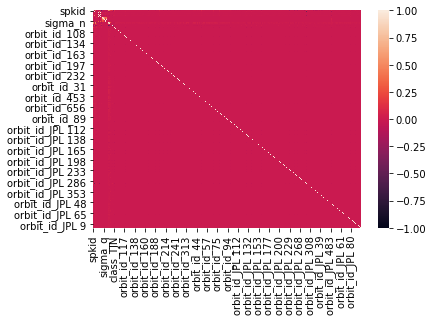

In [56]:
ax = sns.heatmap(corr_df)